# Sympy experiments


# Sympy playground

In [2]:
import sympy
sympy.init_printing()
import sympy.printing.c as ccode
import sympy.printing.c as codegen

from IPython.display import display, Markdown
from sympy.functions import exp
from sympy import diff
from IPython.display import Latex

## tansig

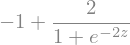

In [3]:
phi,z = sympy.symbols(r'\phi z')
phi = 2 / (1 + exp(-2 * z)) - 1
phi

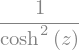

In [4]:
sympy.simplify(diff(phi))

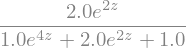

In [5]:
sympy.simplify(0.5 * (1 - (phi**2)))

## Biquad transformation 

In [6]:
s, m,c,d,n,a,b,z,y, T = sympy.symbols("s m c d n a b z y T")

Biquad transfer function

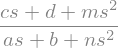

In [7]:
Hn = m*s**2 + c*s + d
Hd = n*s**2 + a*s + b
H = Hn / Hd
H

Substitute 
$s\rightarrow \frac{2}{T}\cdot\frac{z-1}{z+1}$

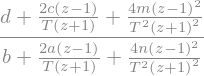

In [8]:
H.subs(s,(2/T)*(z-1)/(z+1))

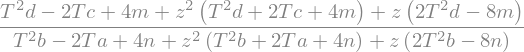

In [9]:
sympy.collect(sympy.simplify(sympy.collect(sympy.expand(H.subs(s,(2/T)*(z-1)/(z+1))),z)),z)

rewrite in terms of $z^{-1}$ delay notation and refactoring the time to get it to the format used in SimulC:

$$\frac{
\left( d - 2 c/T + 4 m/T^{2}\right)z^{-2} + 
 \left(2 d - 8 m/ T^{2}\right)z^{-1} + 
\left( d + 2  c/T + 4 m/T^{2}\right) 
}{
\left( b - 2 a/T + 4 n/T^{2}\right)z^{-2} + 
 \left(2  b - 8 n/T^{2}\right)z^{-1} +
\left( b + 2 a/T + 4 n/T^{2}\right) 
}
$$

## FEM solution

In [10]:
a, b, x, y, x1, x2, x3, x4, y1, y2, y3, y4 = sympy.symbols("a, b, x, y, x_1 x_2 x_3 x_4 y_1 y_2 y_3 y_4")

Solve the set of both equations for a and b


In [11]:
sols = sympy.solve ([
    (1-a)*(1-b)*x1/4 + (1+a)*(1-b)*x2/4 + (1+a)*(1+b)*x3/4 + (1-a)*(1+b)*x4/4 - x , 
    (1-a)*(1-b)*y1/4 + (1+a)*(1-b)*y2/4 + (1+a)*(1+b)*y3/4 + (1-a)*(1+b)*y4/4 - y
    ] , 
    [a, b]
    )


In [12]:
print(len(sols), len(sols[0]), len(sols[1]))


2 2 2


## a1

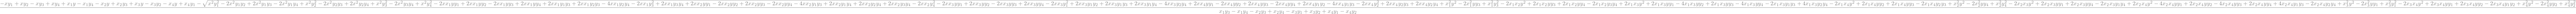

In [13]:
sympy.simplify(sols[0][0])

## b1

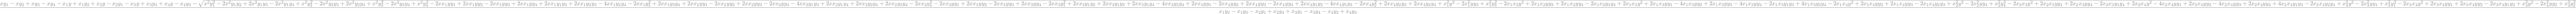

In [14]:
sympy.simplify(sols[0][1])

## a2

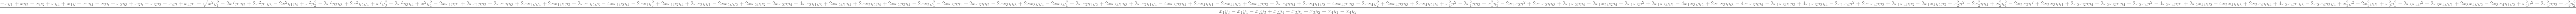

In [15]:
sympy.simplify(sols[1][0])

## b2

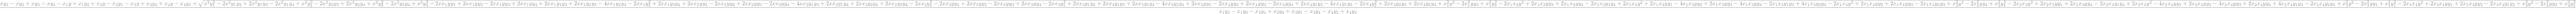

In [16]:
sympy.simplify(sols[1][1])

In [17]:
print(sympy.latex(sols[1][0]))

- \frac{2 x y_{1} - 2 x y_{2} + 2 x y_{3} - 2 x y_{4} - 2 x_{1} y + x_{1} y_{2} + x_{1} y_{4} + 2 x_{2} y - x_{2} y_{1} - x_{2} y_{3} - 2 x_{3} y + x_{3} y_{2} + x_{3} y_{4} + 2 x_{4} y - x_{4} y_{1} - x_{4} y_{3} + \left(\frac{x y_{1} - x y_{2} + x y_{3} - x y_{4} - x_{1} y + x_{1} y_{2} + x_{2} y - x_{2} y_{1} - x_{3} y + x_{3} y_{4} + x_{4} y - x_{4} y_{3}}{x_{1} y_{2} - x_{1} y_{3} - x_{2} y_{1} + x_{2} y_{4} + x_{3} y_{1} - x_{3} y_{4} - x_{4} y_{2} + x_{4} y_{3}} + \frac{\sqrt{x^{2} y_{1}^{2} - 2 x^{2} y_{1} y_{2} + 2 x^{2} y_{1} y_{3} - 2 x^{2} y_{1} y_{4} + x^{2} y_{2}^{2} - 2 x^{2} y_{2} y_{3} + 2 x^{2} y_{2} y_{4} + x^{2} y_{3}^{2} - 2 x^{2} y_{3} y_{4} + x^{2} y_{4}^{2} - 2 x x_{1} y y_{1} + 2 x x_{1} y y_{2} - 2 x x_{1} y y_{3} + 2 x x_{1} y y_{4} + 2 x x_{1} y_{1} y_{3} + 2 x x_{1} y_{2} y_{3} - 4 x x_{1} y_{2} y_{4} - 2 x x_{1} y_{3}^{2} + 2 x x_{1} y_{3} y_{4} + 2 x x_{2} y y_{1} - 2 x x_{2} y y_{2} + 2 x x_{2} y y_{3} - 2 x x_{2} y y_{4} - 4 x x_{2} y_{1} y_{3} + 2 x x_

Evaluate at specific point

In [18]:
subsdic = {
    x1:1.1, y1:0.6,
    x2:2.9,y2:-1.4,
    x3:3.9,y3:3.4,
    x4:1.6,y4:3.4,
    x:3.34,y:0.01
}


In [19]:
a1 = sols[0][0].subs(subsdic)
b1 = sols[0][1].subs(subsdic)
a2 = sols[1][0].subs(subsdic)
b2 = sols[1][1].subs(subsdic)
print(f'a1={a1}\nb1={b1}\na2={a2}\nb2={b2}')

a1=1.13042299452897
b1=-0.375135562916888
a2=-3.68042299452897
b2=-55.6998644370831


In [20]:
print(f'a1={ccode(sols[0][0])}')

TypeError: 'module' object is not callable

In [ ]:
print(f'b1={ccode(sols[0][1])}')

In [ ]:
print(f'a2={ccode(sols[1][0])}')

In [ ]:
print(f'b2={ccode(sols[1][1])}')

# Deriving yaw-pitch-roll Euler angle equations

In [ ]:
# general setup
import sympy
sympy.init_printing()
from sympy.printing.mathml import print_mathml
from IPython.display import display

In [ ]:
# elementary symbols
phi, theta, psi = sympy.symbols(r'\phi \theta \psi')
wx, wy, wz = sympy.symbols(r'\omega_x \omega_y \omega_z')
t = sympy.symbols('t')

In [ ]:
# main variables of interest
def vec(x, y, z): # helper: make a vector
    return sympy.Matrix([[x], [y], [z]])

# angular rate vector
w = vec(wx, wy, wz)

# Euler rate "vector"
dpsi,dtheta,dphi = [sympy.diff(x,t,evaluate=False) for x in [psi,theta,phi]]
deib = vec(dphi, dtheta, dpsi)

In [23]:
# rotation matrices
s, c = sympy.sin, sympy.cos

def Ephi(phi): return sympy.Matrix([[1,  0,      0],
                                    [0,  c(phi), s(phi)],
                                    [0, -s(phi), c(phi)]])
def Ethe(the): return sympy.Matrix([[c(the), 0, -s(the)],
                                    [0,      1,  0],
                                    [s(the), 0,  c(the)]])
def Epsi(psi): return sympy.Matrix([[ c(psi), s(psi), 0],
                                    [-s(psi), c(psi), 0],
                                    [0,       0,      1]])

In [24]:
# intermediate frame 2 to body (roll rotation)
H2b = Ephi(phi)
# intermediate frame 1 to frame 1 (pitch rotation)
H12 = Ethe(theta)

# the core equation; each euler rate can be expressed as an angular rate about some axis;
# these sum to the total angular rate, but we must rotate everything to the body axes.
w_sum_deib = vec(dphi, 0, 0) + H2b * vec(0, dtheta, 0) + H2b * H12 * vec(0, 0, dpsi)

display(sympy.Equality(w, w_sum_deib))

NameError: name 'theta' is not defined

In [25]:
sol = sympy.solve(w - w_sum_deib, deib)
for var in deib:
    display(sympy.Equality(var, sol[var]))

NameError: name 'w' is not defined

## convert to python functions

    vignet =(np.cos(np.pi*vangl/(2*angles[-1])))**0.1 + 0.09

c + \cos^{p}{\left(\frac{\pi a}{2 m} \right)}


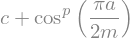

In [26]:
import sympy
import numpy as np
from sympy.codegen.ast import Assignment

t, p,v, x,y,s, m,c,d,n,a,b,z,y, T = sympy.symbols("\\theta p v x y s m c d n a b z y T")

y = (sympy.cos(sympy.pi * a / (2. * m)))**p + c
mstr = sympy.latex(y)
subsdic = {c:0.09, p:0.1,m:0.471}
T = y.subs(subsdic)
lstr = sympy.latex(T)

print(mstr)
display(y)
display(T)

In [ ]:
# pstr = sympy.pycode(Assignment(v, T)).replace('math','np')
pstr = sympy.pycode(T).replace('math','np')

print(pstr)
a = np.linspace(0,0.471,100)
eval(pstr)

In [ ]:
import pyradi.ryplot as ryplot
lstr = lstr.replace(r' \pi a ',r' \cdot\pi\cdot \theta ')
print(lstr)
p = ryplot.Plotter(1,1,1,f'${lstr}$',(12,5))
p.plot(1,a,eval(pstr))
                   
                   

## Solve circle 

Equation for zc


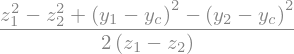

Equation for r


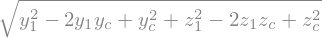

---------------------------------------
z_c = 2.9749999999999996
r = 1.47838594419725
---------------------------------------
z_1 = Symbol('z_1')
z_2 = Symbol('z_2')
y_1 = Symbol('y_1')
y_c = Symbol('y_c')
y_2 = Symbol('y_2')
e = [(z_1**2 - z_2**2 + (y_1 - y_c)**2 - (y_2 - y_c)**2)/(2*(z_1 - z_2))]
y_1 = Symbol('y_1')
y_c = Symbol('y_c')
z_1 = Symbol('z_1')
z_c = Symbol('z_c')
e = [-sqrt(y_1**2 - 2*y_1*y_c + y_c**2 + z_1**2 - 2*z_1*z_c + z_c**2), sqrt(y_1**2 - 2*y_1*y_c + y_c**2 + z_1**2 - 2*z_1*z_c + z_c**2)]


In [22]:
# import sympy
# import numpy as np
# from sympy.codegen.ast import Assignment

y1,y2,yc,z1,z2,zc,r = sympy.symbols("y_1,y_2,y_c,z_1,z_2 z_c r")
eqzc = sympy.solve((y1-yc)**2 +(z1-zc)**2-((y2-yc)**2 +(z2-zc)**2),zc)
print('Equation for zc')
display(eqzc[0])
eqr = sympy.solve((y1-yc)**2 +(z1-zc)**2-r**2,r)
print('Equation for r')
display(eqr[1])

print('---------------------------------------')

dicsubs = {y1:1.2,y2:2.5,z1:1.5,z2:2.5,yc:1.1}
zcval = float(eqzc[0].subs(dicsubs))
print(f'z_c = {zcval}')
r = eqr[1].subs(dicsubs).subs({zc:zcval})
print(f'r = {r}')

print('---------------------------------------')
print(sympy.python(eqzc))
print(sympy.python(eqr))
